# Cian flats EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# USE THIS STYLE
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# 
# OR THIS STYLE
import aquarel

import warnings

warnings.filterwarnings("ignore")

theme = aquarel.load_theme("arctic_light")
theme.set_font(family="serif")
theme.apply()

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
custom_pallete = {
    "red": "#BF616A",
    "orange": "#D08770",
    "yellow": "#EBCB8B",
    "green": "#A3BE8C",
    "purple": "#B48EAD",
    "light_green": "#8FBCBB",
    "light_gray_blue": "#88C0D0",
    "light_blue": "#81A1C1",
    "blue": "#5E81AC",
}

## Load data

In [3]:
df_cian = pd.read_csv("./data/cian_houses_dataset.csv")
df_cian.head()

,price,location,geo_lat,geo_lng,metro,floor,floor_count,square,living_square,kitchen_square,...,ceiling_height,view,house_type,heating,breakdown,parking,accomodation_type,author,url,room_count
0,18374400,"Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...",55.802530,37.620945,Марьина Роща,34,49,38.28,11.8,unknown,...,3.12,unknown,Монолитно-кирпичный,unknown,unknown,unknown,Новостройка,КОРТРОС,https://www.cian.ru/sale/flat/302789697/,1
1,49954800,"Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1",55.752541,37.635727,Китай,7,8,53.20,unknown,24.1,...,3.0,unknown,Монолитно-кирпичный,unknown,unknown,unknown,Вторичка / Апартаменты,unknown,https://www.cian.ru/sale/flat/301496936/,1
2,8170000,"Москва, НАО (Новомосковский), Филимонковское п...",55.552637,37.337172,Филатов Луг,2,5,31.00,unknown,10.0,...,3.0,Во двор,unknown,Нет информации,Нет,unknown,Вторичка,unknown,https://www.cian.ru/sale/flat/303552909/,1
3,20206500,"Москва, СВАО, р-н Останкинский, ул. Годовикова...",55.810466,37.624247,Алексеевская,34,37,28.50,21.4,unknown,...,3.01,На улицу,Монолитно-кирпичный,unknown,unknown,unknown,Новостройка,КОРТРОС,https://www.cian.ru/sale/flat/306568424/,1
4,17119620,"Москва, ЮАО, р-н Даниловский, Автозаводская ул...",55.706597,37.632285,Тульская,6,20,38.82,10.6,18.6,...,2.85,Во двор,Монолитный,unknown,unknown,unknown,Новостройка,unknown,https://www.cian.ru/sale/flat/305679800/,1


In [4]:
df_cian.shape

(8053, 22)

Разделим на численные и категориальные фитчи

In [5]:
numerical_features = [f for f in df_cian.columns if df_cian.dtypes[f] != "object"]
categorical_features = [f for f in df_cian.columns if df_cian.dtypes[f] == "object"]

In [6]:
numerical_features

['price', 'geo_lat', 'geo_lng', 'floor', 'floor_count', 'square', 'room_count']

In [7]:
df_cian["price"].describe()

count    8.053000e+03
mean     1.169362e+08
std      2.377114e+08
min      9.000000e+05
25%      1.496352e+07
50%      3.938630e+07
75%      1.150000e+08
max      3.592900e+09
Name: price, dtype: float64

## Гистограмма распределения цен на квартиры

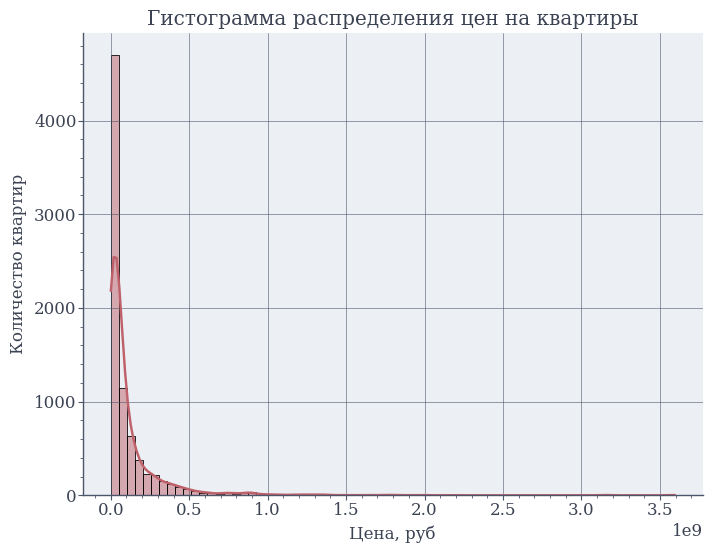

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(
    data=df_cian["price"],
    bins=70,
    color=custom_pallete["red"],
    kde=True,
    ax=ax,
)

ax.set_title("Гистограмма распределения цен на квартиры")
ax.set_xlabel("Цена, руб")
ax.set_ylabel("Количество квартир")

plt.show()

In [9]:
import matplotlib.ticker as mticker

mticker.Locator.MAXTICKS = 2000

In [10]:
import babel.numbers

def ru_currency_format(currency):
    return babel.numbers.format_compact_currency(
        currency,
        "RUB",
        locale="ru_RU",
    )

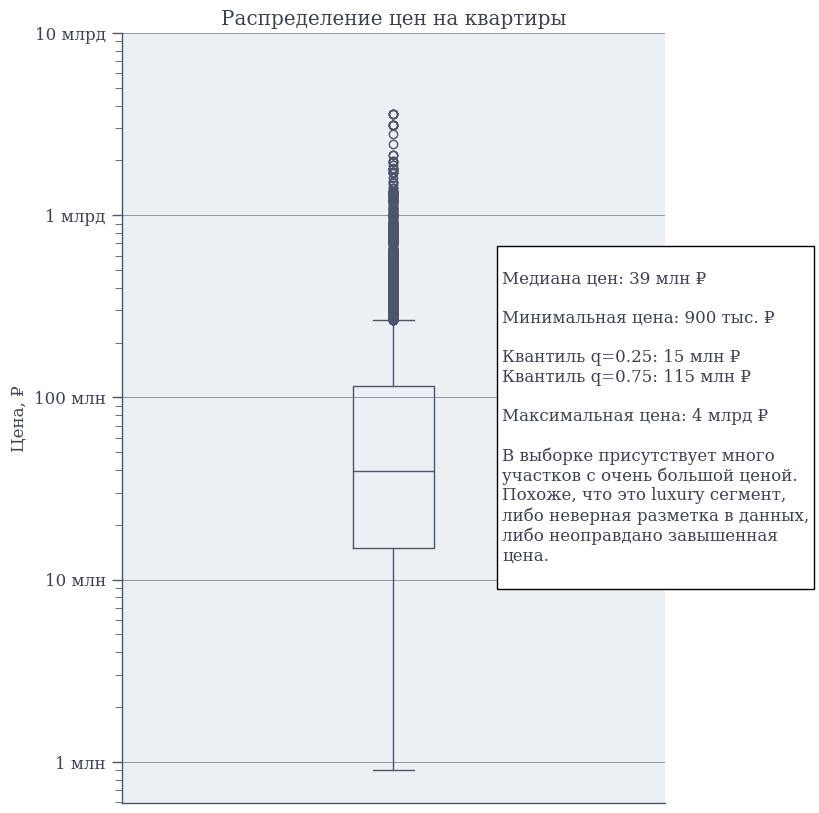

In [12]:
prices_description = df_cian["price"].describe(include="all")

text_for_boxplot = f"""
Медиана цен: {ru_currency_format(prices_description["50%"])}

Минимальная цена: {ru_currency_format(prices_description["min"])}

Квантиль q=0.25: {ru_currency_format(prices_description["25%"])}
Квантиль q=0.75: {ru_currency_format(prices_description["75%"])}

Максимальная цена: {ru_currency_format(prices_description["max"])}

В выборке присутствует много 
участков с очень большой ценой. 
Похоже, что это luxury сегмент, 
либо неверная разметка в данных,
либо неоправдано завышенная
цена.
"""

plot_info = {
    "title": "Распределение цен на квартиры",
    "xlabel": "",
    "ylabel": "Цена, ₽",
    "text": text_for_boxplot,
}

fig, ax = plt.subplots(figsize=(7, 10))

ax.boxplot(df_cian["price"])

ax.set(
    title=plot_info["title"],
    ylabel=plot_info["ylabel"],
)


ax.annotate(
    plot_info["text"],
    xy=(1.2, 10e6),
    bbox=dict(boxstyle="square", fc="w", alpha=1),
    fontsize=12,
)

ax.xaxis.set_major_locator(mticker.NullLocator())

ax.set_yscale("log")
ax.yaxis.set_major_locator(mticker.LogLocator(base=10, numticks=10))
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: str(ru_currency_format(x))[:-1])
)
ax.tick_params(axis="y", length=7, width=1, which="major")
ax.tick_params(axis="y", length=5, which="minor")
ax.set_ylim(0, 1e10)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

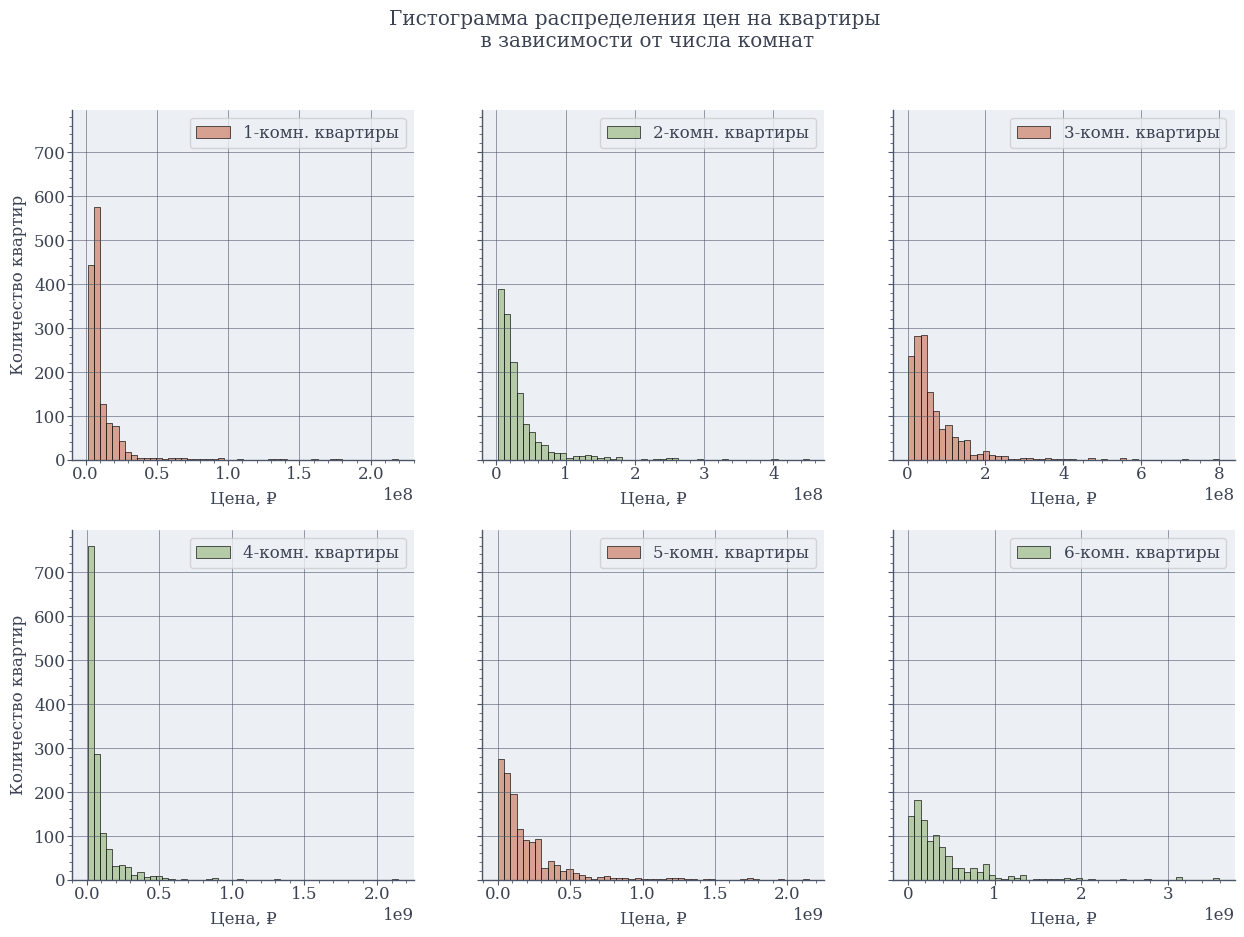

In [15]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(15, 10),
    sharey=True,
)

fig.suptitle(
    """Гистограмма распределения цен на квартиры
    в зависимости от числа комнат"""
)


for i in range(2):
    for j in range(3):
        sns.histplot(
            data=df_cian[df_cian["room_count"] == 3 * (i) + (j + 1)]["price"],
            bins=50,
            color=(
                custom_pallete["green"]
                if (3 * (i) + (j + 1)) % 2 == 0
                else custom_pallete["orange"]
            ),
            # kde=True,
            ax=ax[i][j],
            label=f"{3 * (i) + (j + 1)}-комн. квартиры",
        )
        ax[i][j].legend()
        ax[i][j].set_ylabel("Количество квартир")
        ax[i][j].set_xlabel("Цена, ₽")

plt.show()

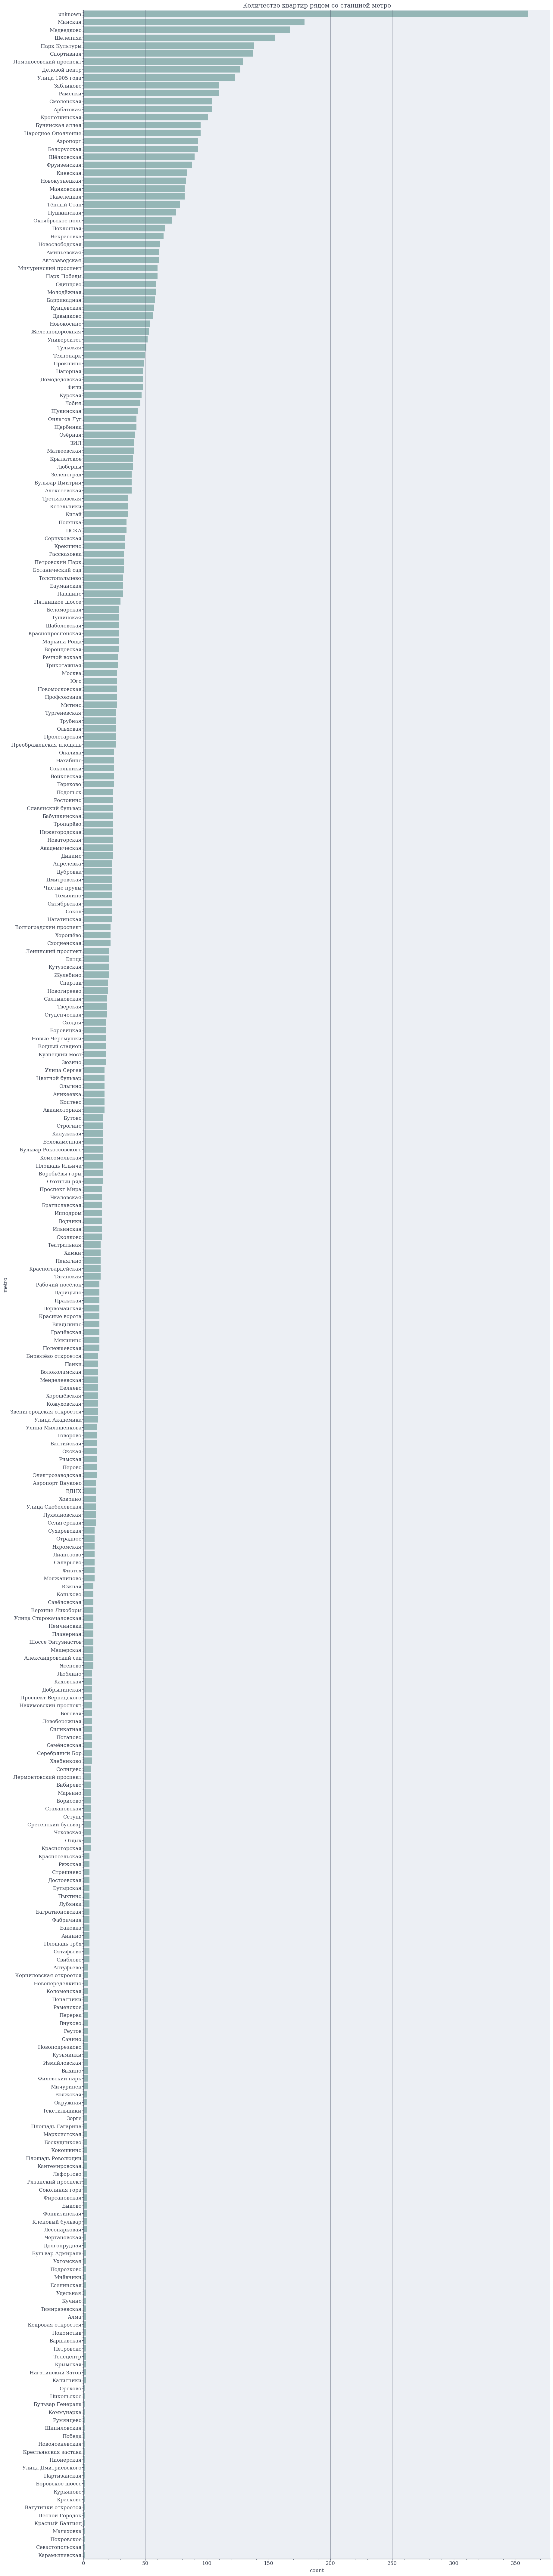

In [17]:
fig, ax = plt.subplots(
    figsize=(20, 110),
)

sns.barplot(
    data=df_cian["metro"].value_counts().reset_index(),
    x="count",
    y="metro",
    ax=ax,
)

ax.set_title("Количество квартир рядом со станцией метро")

plt.show()

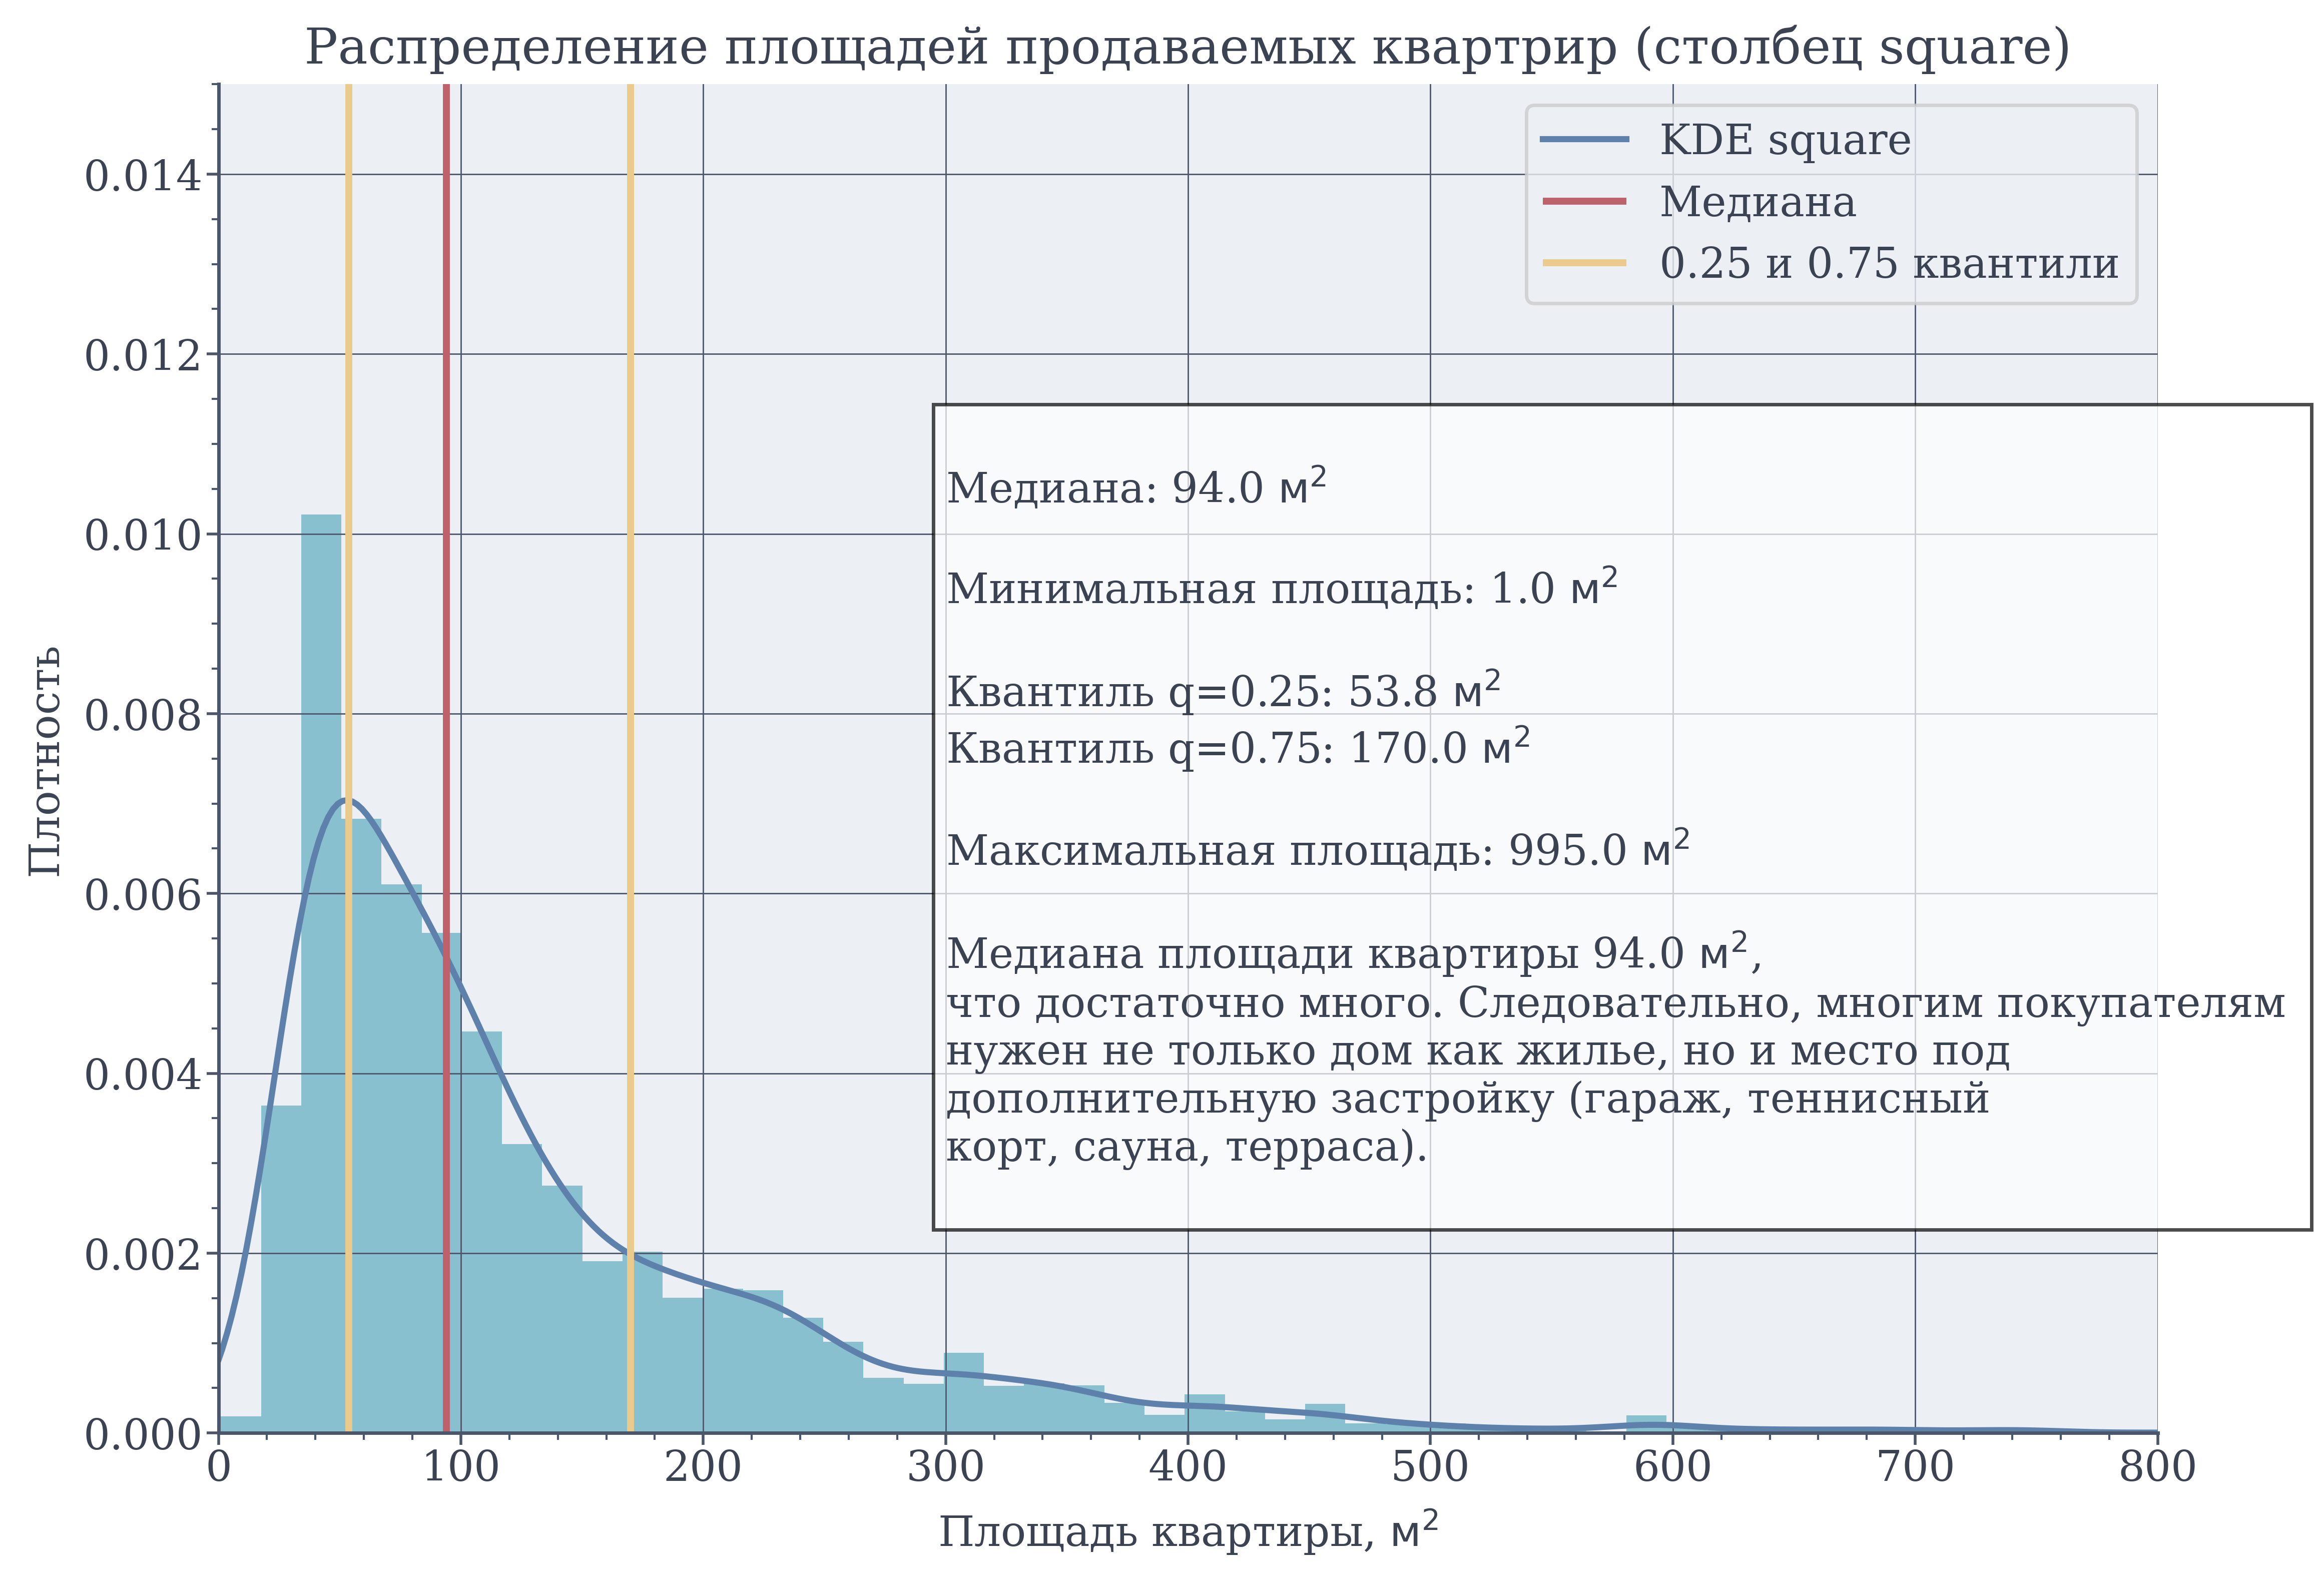

In [45]:
square_description = df_cian["square"].describe(include="all")


m_square = "$\mathrm{м}^2$"
text_for_histplot = f"""
Медиана: {square_description["50%"]} {m_square}

Минимальная площадь: {square_description["min"]} {m_square}

Квантиль q=0.25: {square_description["25%"]} {m_square}
Квантиль q=0.75: {square_description["75%"]} {m_square}

Максимальная площадь: {square_description["max"]} {m_square}
"""
text_for_histplot = text_for_histplot + f"""
Медиана площади квартиры составила {square_description["50%"]} {m_square}, 
что достаточно много. .
"""

plot_info = {
    "title": "Распределение площадей продаваемых квартрир (столбец square)",
    "xlabel": f"Площадь квартиры, {m_square}",
    "ylabel": "Плотность",
    "text": text_for_histplot,
}

plt.figure(figsize=(10, 7), dpi=500)

plt.hist(
    df_cian["square"],
    bins=60,
    density=True,
    color=custom_pallete["light_gray_blue"],
)
df_cian["square"].plot.kde(color=custom_pallete["blue"], label="KDE square")

plt.vlines(
    x=square_description["50%"],
    ymax=1,
    ymin=0,
    colors=custom_pallete["red"],
    linewidth=2,
    label="Медиана"
)

plt.vlines(
    x=(
        square_description["25%"],
        square_description["75%"],
    ),
    ymax=1,
    ymin=0,
    colors=custom_pallete["yellow"],
    linewidth=2,
    label="0.25 и 0.75 квантили"
)

plt.annotate(
    plot_info["text"],
    xy=(300, 2.5e-3),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
)

plt.xlabel(plot_info["xlabel"])
plt.ylabel(plot_info["ylabel"])


plt.xlim(0, 800)
plt.ylim(0, 1.5e-2)

plt.title(plot_info["title"])
plt.legend()

# pdf.savefig(bbox_inches = 'tight')
plt.show()
